In [2]:
#2a
import pandas as pd

# Reemplaza 'tu_archivo.dta' por el nombre exacto de tu archivo
df05 = pd.read_stata('usu_individual_t105.dta')

# Reemplaza 'tu_archivo.dta' por el nombre exacto de tu archivo
df25 = pd.read_excel('usu_individual_T125.xlsx')

# Muestra las primeras filas para verificar
df05.head()
df25.head()

print(df05.head())
print(df25.head())



     CODUSU  nro_hogar componente  h15    ano4       trimestre  \
0  125098          1.0        1.0   Sí  2005.0  1er. Trimestre   
1  125188          1.0        1.0   Sí  2005.0  1er. Trimestre   
2  125188          1.0        2.0   Sí  2005.0  1er. Trimestre   
3  125188          1.0        3.0  0.0  2005.0  1er. Trimestre   
4  125242          1.0        1.0   Sí  2005.0  1er. Trimestre   

              region mas_500              aglomerado  pondera  ... deccfr  \
0  Gran Buenos Aires       S  Ciudad de Buenos Aires   1017.0  ...     08   
1  Gran Buenos Aires       S  Ciudad de Buenos Aires   1062.0  ...     02   
2  Gran Buenos Aires       S  Ciudad de Buenos Aires   1062.0  ...     02   
3  Gran Buenos Aires       S  Ciudad de Buenos Aires   1062.0  ...     02   
4  Gran Buenos Aires       S  Ciudad de Buenos Aires   1103.0  ...     09   

  ideccfr rdeccfr gdeccfr pdeccfr adeccfr pj1_1 pj2_1 pj3_1 idimpp  
0              07      08              05   0.0   0.0   0.0  00000  
1 

In [24]:
#2a

#Limpieza del resto de regiones y queda solo Patagonia


# Pongo mismo nombre de columnas (region)
df05.columns = [c.strip().lower() for c in df05.columns]
df25.columns = [c.strip().lower() for c in df25.columns]

# Función para filtrar Patagonia: recibe un DataFrame y el nombre de la columna de región (por defecto "region"). 
# Verifica que exista esa columna. Si no existe, lanza un error claro.
def filtrar_patagonia(df, col_region="region"):
    if col_region not in df.columns:
        raise ValueError(f"No se encontró la columna '{col_region}'.")
    s = df[col_region]
    mask = (
        s.astype(str).str.upper().eq("PATAGÓNICA") |    # caso texto (2005)
        pd.to_numeric(s, errors="coerce").eq(44)        # caso código (2025)
    )
    return df.loc[mask].copy()

# Aplico el filtro --> Resultado: dos DataFrames que contienen solo observaciones de la región NEA para cada año.
pat05 = filtrar_patagonia(df05, "region")
pat25 = filtrar_patagonia(df25, "region")

# Chequeos rápidos (cantidad de filas y columnas)
print("----- 2005 -----")
print("Filas totales:", len(df05), " | Filas Patagonia:", len(pat05))
print("Columnas totales:", len(df05.columns))
print("Columnas después del filtro:", len(pat05.columns))

print("\n----- 2025 -----")
print("Filas totales:", len(df25), " | Filas Patagonia:", len(pat25))
print("Columnas totales:", len(df25.columns))
print("Columnas después del filtro:", len(pat25.columns))

print("\nEjemplo valores únicos de 'region' en 2005:", pat05["region"].unique()[:5])
print("Ejemplo valores únicos de 'region' en 2025:", pat25["region"].unique()[:5])

print("Regiones únicas en 2005 filtradas:", pat05["region"].unique())
print("Regiones únicas en 2025 filtradas:", pat25["region"].unique())

----- 2005 -----
Filas totales: 47030  | Filas Patagonia: 3229
Columnas totales: 176
Columnas después del filtro: 176

----- 2025 -----
Filas totales: 45425  | Filas Patagonia: 5359
Columnas totales: 235
Columnas después del filtro: 235

Ejemplo valores únicos de 'region' en 2005: ['Patagónica']
Categories (6, object): ['Gran Buenos Aires' < 'NOA' < 'NEA' < 'Cuyo' < 'Pampeana' < 'Patagónica']
Ejemplo valores únicos de 'region' en 2025: [44]
Regiones únicas en 2005 filtradas: ['Patagónica']
Categories (6, object): ['Gran Buenos Aires' < 'NOA' < 'NEA' < 'Cuyo' < 'Pampeana' < 'Patagónica']
Regiones únicas en 2025 filtradas: [44]


In [25]:
#2a diccionarios para recodificar variables y llevarlas al mismo formato


import numpy as np
import pandas as pd

# --- 0) Variables de interés ---
cols_interes = [
    "ch04","ch06","ch07","ch08","nivel_ed","estado","cat_inac",
    "ipcf","ch15","ch09","pp10a","pp3e_tot","pp07a","pp10e","cat_ocup"
]

# --- 1) Diccionarios corregidos para 2005 (sirven también si hay texto en 2025) ---
est_civil = {"Unido":1,"Casado":2,"Separado o divorciado":3,"Viudo":4,"Soltero":5,"Ns./Nr.":9}
cob_medica = {
    "Obra social (incluye PAMI)":1,
    "Mutual/Prepaga/Servicio de emergencia":2,
    "Planes y seguros públicos":3,
    "No paga ni le descuentan":4,
    "Ns./Nr.":9,
    "Obra social y mutual/prepaga/servicio de emergencia":12,
    "Obra social y planes y seguros públicos":13,
    "Mutual/prepaga/servicio de emergencia/planes y seguros públicos":23,
    "Obra social, mutual/prepaga/servicio de emergencia y Planes y Seguros Públicos":123
}
alfab = {"Sí":1,"No":2,"Menor de 2 años":3,"Ns./Nr.":9, 0.0: np.nan}
nivel_ed_map = {
    "Primaria Incompleta":1,"Primaria Completa":2,"Secundaria Incompleta":3,"Secundaria Completa":4,
    "Superior Universitaria Incompleta":5,"Superior Universitaria Completa":6,"Sin instrucción":7,
    "Ns./Nr":9,"Ns./Nr.":9
}
cond_act = {"Entrevista individual no realizada (no respuesta al cuestion)":0,
            "Ocupado":1,"Desocupado":2,"Inactivo":3,"Menor de 10 años":4}
inactividad = {"Jubilado/pensionado":1,"Rentista":2,"Estudiante":3,"Ama de casa":4,
               "Menor de 6 años":5,"Discapacitado":6,"Otros":7, 0.0: np.nan}
nacimiento = {"En esta localidad":1,"En otra localidad":2,"En otra provincia (especificar)":3,
              "En un país limítrofe":4,"En otro país":5,"Ns./Nr":9,"Ns./Nr.":9}
busca_trab = {"...menos de 1 mes?":1,"...de 1 a 3 meses?":2,"...más de 3 a 6 meses?":3,
              "...más de 6 a 12 meses?":4,"...más de 1 año?":5}
tiempo_trabajando = {"Menos de un mes":1,"1 a 3 meses":2,"Más de 3 a 6 meses":3,
                     "Más de 6 a 12 meses":4,"Más de 1 a 5 años":5,"Más de 5 años":6,"Ns./Nr.":9}
tiempo_desocupado = {"...menos de 1 mes?":1,"...de 1 a 3 meses?":2,"...más de 3 a 6 meses?":3,
                     "...más de 6 a 12 meses?":4,"...más de 1 a 3 años?":5,"...más de 3 años?":6}
cat_ocup_map = {"Patrón":1,"Cuenta propia":2,"Obrero o empleado":3,
                "Trabajador familiar sin remuneración":4, 0.0: np.nan}

In [26]:
# Código que me pasó Tomi tutor, recodificacion de las bases para fusionarlas y trabajar con la base entera

sexo_map = {"Varón": 1, "Mujer": 2}

pat05_num = pat05.copy()

pat05_num["ch04"] = pat05_num["ch04"].map(sexo_map)
pat05_num["ch07"] = pat05_num["ch07"].map(est_civil)
pat05_num["ch08"] = pat05_num["ch08"].map(cob_medica)
pat05_num["nivel_ed"] = pat05_num["nivel_ed"].map(nivel_ed_map)
pat05_num["estado"] = pat05_num["estado"].map(cond_act)
pat05_num["cat_inac"] = pat05_num["cat_inac"].map(inactividad)
pat05_num["ch15"] = pat05_num["ch15"].map(nacimiento)
pat05_num["ch09"] = pat05_num["ch09"].map(alfab)
pat05_num["pp10a"] = pat05_num["pp10a"].map(busca_trab)
pat05_num["pp07a"] = pat05_num["pp07a"].map(tiempo_trabajando)
pat05_num["pp10e"] = pat05_num["pp10e"].map(tiempo_desocupado)
pat05_num["cat_ocup"] = pat05_num["cat_ocup"].map(cat_ocup_map)

cols_interes = [
    "ch04","ch06","ch07","ch08","nivel_ed","estado","cat_inac",
    "ipcf","ch15","ch09","pp10a","pp3e_tot","pp07a","pp10e","cat_ocup", "ano4"
]

pat05_num = pat05_num[cols_interes]
pat25_num = pat25[cols_interes]

patagonia_filtrada = pd.concat([pat05_num, pat25_num], axis=0, ignore_index=True)

=== Tabla de faltantes por año ===
          2005  2025
ch04         0     0
ch06         0     0
ch07         0     0
ch08         0     0
nivel_ed   692     0
estado       2     0
cat_inac  1385     0
ipcf         0     0
ch15         0     0
ch09         1     0
pp10a     3127  5237
pp3e_tot     0  3036
pp07a     2226  3036
pp10e     3139  5237
cat_ocup  1868     0
ano4         0     0


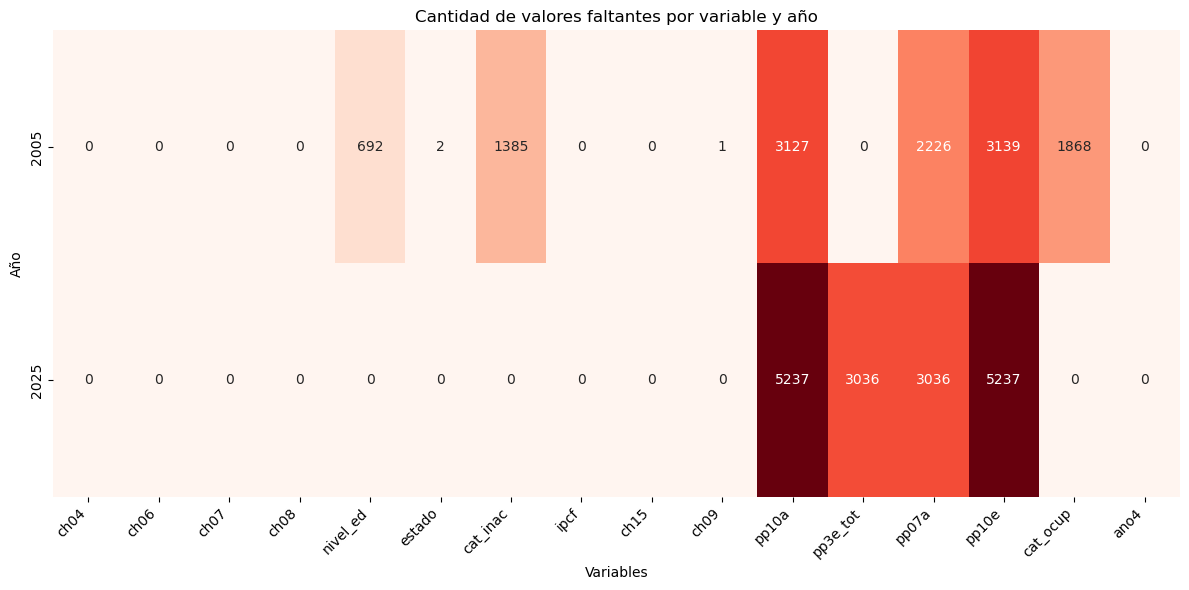


Top variables con más faltantes en 2005:
pp10e       3139
pp10a       3127
pp07a       2226
cat_ocup    1868
cat_inac    1385
Name: 2005, dtype: int64

Top variables con más faltantes en 2025:
pp10a       5237
pp10e       5237
pp3e_tot    3036
pp07a       3036
ch04           0
Name: 2025, dtype: int64


In [6]:
#2b 

#Heatmap de datos faltantes por año


#Paso 2. Contar valores faltantes por variable
na_2005 = pat05_num.isna().sum()
na_2025 = pat25_num.isna().sum()

na_summary = pd.DataFrame({"2005": na_2005, "2025": na_2025})
print("=== Tabla de faltantes por año ===")
print(na_summary)

#Paso 3. Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(na_summary.T, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("Cantidad de valores faltantes por variable y año")
plt.xlabel("Variables")
plt.ylabel("Año")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#Paso 4. Identificar cuáles tienen más faltantes
print("\nTop variables con más faltantes en 2005:")
print(na_summary["2005"].sort_values(ascending=False).head())

print("\nTop variables con más faltantes en 2025:")
print(na_summary["2025"].sort_values(ascending=False).head())

# En la comparación de 2005 y 2025, se observa que las variables con más valores faltantes de 2005 son ch04, ch07, ch08, ch015 y estado,  
# donde concentran 16.145 casos. En cuanto al 2025,se observa que las variables con más valores faltantes son pp10a, pp10e, pp07a, pp3e_tot 
# que concentran 16.546 casos. El resto de las variables presentan muy pocos o ningún valor perdido. Esto sugiere que la calidad de los 
# datos es mayor en las variables básicas (como sexo o edad), mientras que la información más sensible (como ingresos o cobertura médica) 
# presenta mayores problemas de no respuesta.

In [7]:
#2c

# Copiar la base para no pisar el original
patagonia_limpia = patagonia_filtrada.copy()

# 1. Ingresos negativos -> NaN: nunca deberían ser negativos.
patagonia_limpia.loc[patagonia_limpia["ipcf"] < 0, "ipcf"] = np.nan

# 2. Horas de trabajo fuera de rango razonable (ej. <0 o >100) -> NaN: no debería haber valores negativos o absurdamente altos
patagonia_limpia.loc[(patagonia_limpia["pp3e_tot"] < 0) | (patagonia_limpia["pp3e_tot"] > 100), "pp3e_tot"] = np.nan

# 3. Reglas de validación por categorías: no deben aparecer códigos fuera del rango definido en los diccionarios  
valid_ranges = {
    "ch04": [1, 2],
    "ch07": [1, 2, 3, 4, 5],
    "ch08": [1, 2, 3, 4, 9, 12, 13, 23, 123],
    "nivel_ed": [1, 2, 3, 4, 5, 6, 7, 9],
    "estado": [0, 1, 2, 3, 4],
    "cat_inac": [1, 2, 3, 4, 5, 6, 7],
    "ch15": [1, 2, 3, 4, 5, 9],
    "ch09": [1, 2, 3],
    "pp10a": [1, 2, 3, 4, 5],
    "pp07a": [1, 2, 3, 4, 5, 6, 9],
    "pp10e": [1, 2, 3, 4, 5, 6],
    "cat_ocup": [1, 2, 3, 4]
}

for col, valid_vals in valid_ranges.items():
    patagonia_limpia.loc[~patagonia_limpia[col].isin(valid_vals), col] = np.nan

print("Valores faltantes después de limpieza:")
print(patagonia_limpia.isna().sum().sort_values(ascending=False).head(10))

#Durante la etapa de limpieza se corrigieron valores fuera de rango en las variables seleccionadas. En particular, se reemplazaron como 
#faltantes los ingresos negativos en ipcf y las horas semanales de trabajo menores a 0 o mayores a 100 en pp3e_tot. Asimismo, se 
#recodificaron como NaN aquellas categorías que aparecían fuera de los valores válidos definidos por la codificación de la EPH 
#(por ejemplo, códigos no reconocidos en estado civil, cobertura médica o nivel educativo). Este proceso asegura que los análisis 
#posteriores se realicen únicamente con datos consistentes.


Valores faltantes después de limpieza:
pp10e       8395
pp10a       8364
pp07a       5861
cat_ocup    4811
cat_inac    3841
pp3e_tot    3040
nivel_ed     692
estado         2
ch09           2
ch04           0
dtype: int64


=== Tabla de faltantes por año ===
          2005  2025
ch04         0     0
ch06         0     0
ch07         0     0
ch08         0     0
nivel_ed   692     0
estado       2     0
cat_inac  1385  2456
ipcf         0     0
ch15         0     0
ch09         1     1
pp10a     3127  5237
pp3e_tot     2  3038
pp07a     2226  3635
pp10e     3139  5256
cat_ocup  1868  2943
ano4         0     0


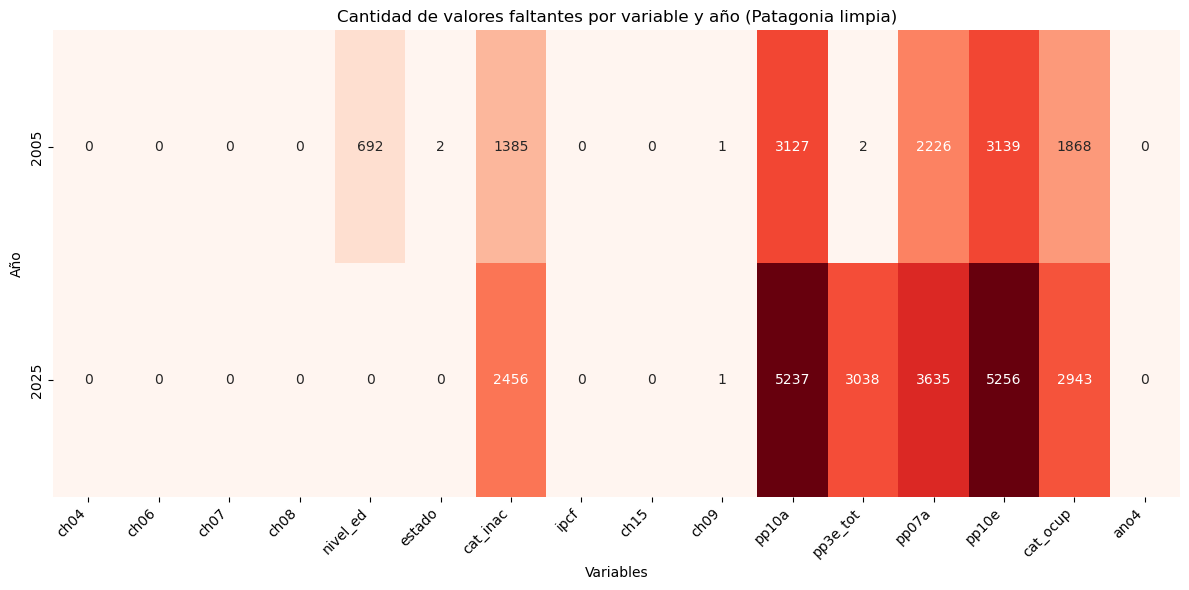


Top variables con más faltantes en 2005:
pp10e       3139
pp10a       3127
pp07a       2226
cat_ocup    1868
cat_inac    1385
Name: 2005, dtype: int64

Top variables con más faltantes en 2025:
pp10e       5256
pp10a       5237
pp07a       3635
pp3e_tot    3038
cat_ocup    2943
Name: 2025, dtype: int64


In [8]:
#2c heatmap de la ultima base de datos con todos los valores corregidos

pat05_num = patagonia_limpia[patagonia_limpia["ano4"] == 2005]
pat25_num = patagonia_limpia[patagonia_limpia["ano4"] == 2025]

na_2005 = pat05_num.isna().sum()
na_2025 = pat25_num.isna().sum()

na_summary = pd.DataFrame({"2005": na_2005, "2025": na_2025})
print("=== Tabla de faltantes por año ===")
print(na_summary)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(na_summary.T, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("Cantidad de valores faltantes por variable y año (Patagonia limpia)")
plt.xlabel("Variables")
plt.ylabel("Año")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

print("\nTop variables con más faltantes en 2005:")
print(na_summary["2005"].sort_values(ascending=False).head())

print("\nTop variables con más faltantes en 2025:")
print(na_summary["2025"].sort_values(ascending=False).head())



Tabla de composición por sexo en 2005 y 2025:

Sexo    Mujer  Varón
ano4                
2005.0   1654   1575
2025.0   2709   2650


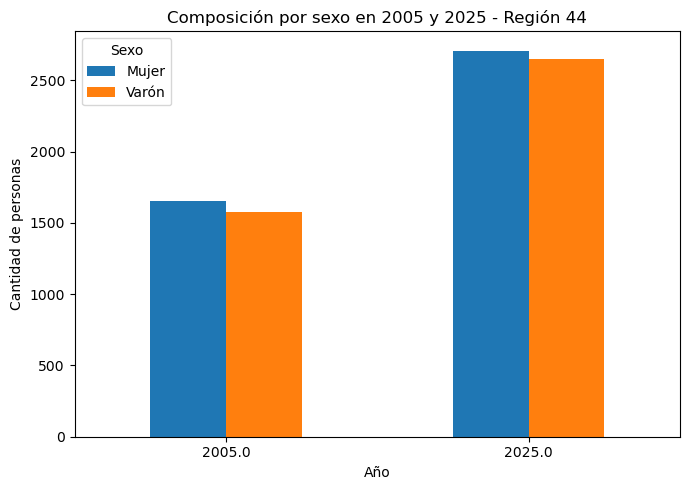

In [27]:
#Consigna 3

import pandas as pd
import matplotlib.pyplot as plt

# 1) Armo tabla: filas = año, columnas = sexo
sexo_labels = {1: "Varón", 2: "Mujer"}

tabla = (
    patagonia_limpia
      .assign(Sexo=patagonia_limpia["ch04"].map(sexo_labels))
      .groupby(["ano4", "Sexo"])
      .size()
      .unstack("Sexo")
      .fillna(0)
      .astype(int)
      .sort_index()
)

print("Tabla de composición por sexo en 2005 y 2025:\n")
print(tabla)

# 2) Gráfico: barras agrupadas por año (X = años)
ax = tabla.plot(kind="bar", figsize=(7,5))
ax.set_title("Composición por sexo en 2005 y 2025 - Región 44")
ax.set_xlabel("Año")
ax.set_ylabel("Cantidad de personas")
ax.legend(title="Sexo")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


/var/folders/rg/fmqzpydj2q10b1ssdl0qnygc0000gn/T/ipykernel_20377/120384488.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  patagonia_limpia['Edad'] = patagonia_limpia['ch06'].replace({


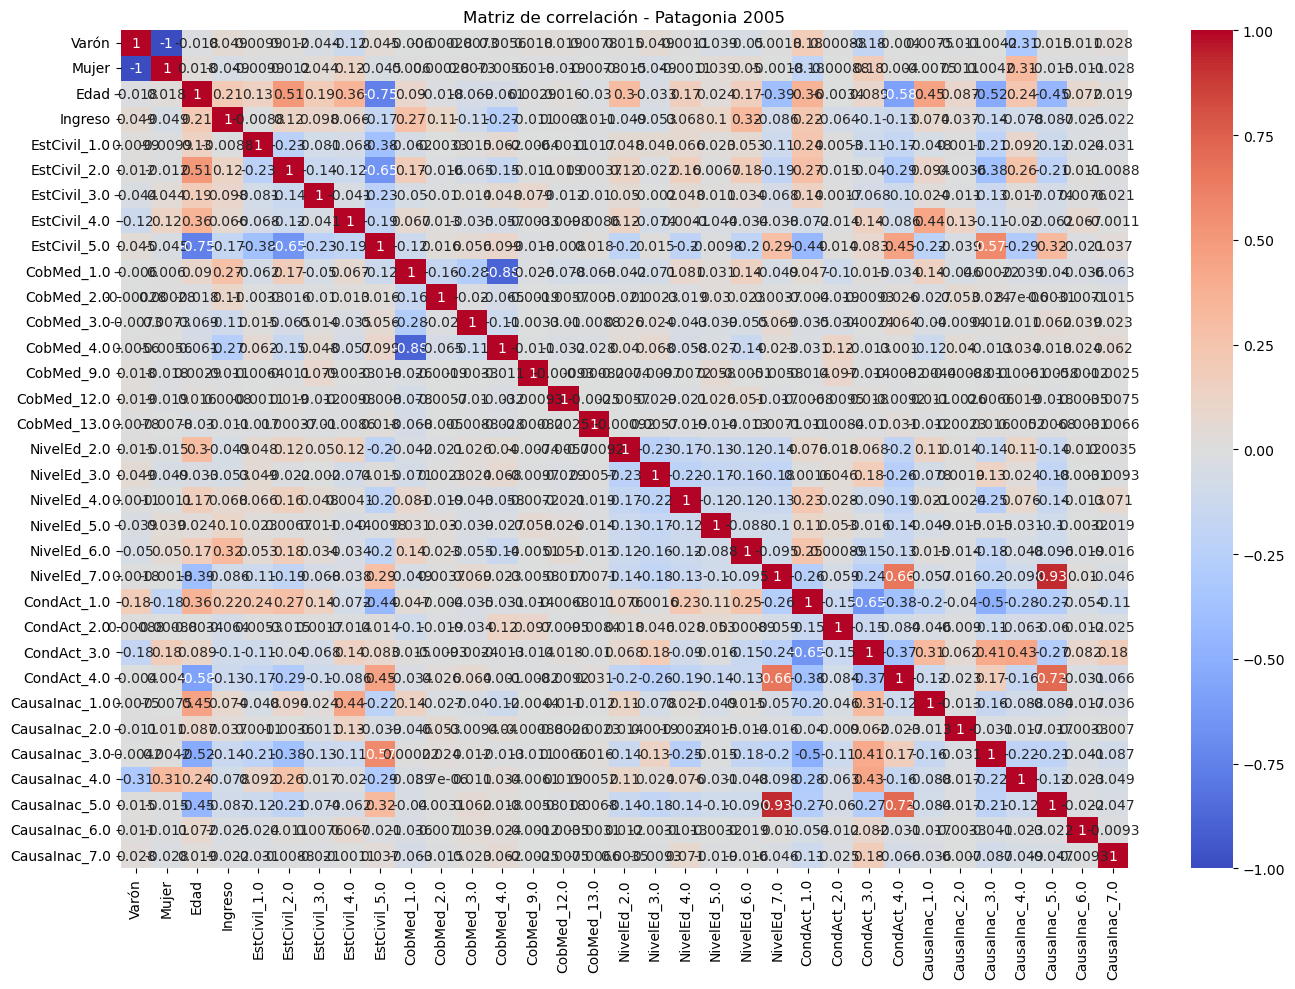

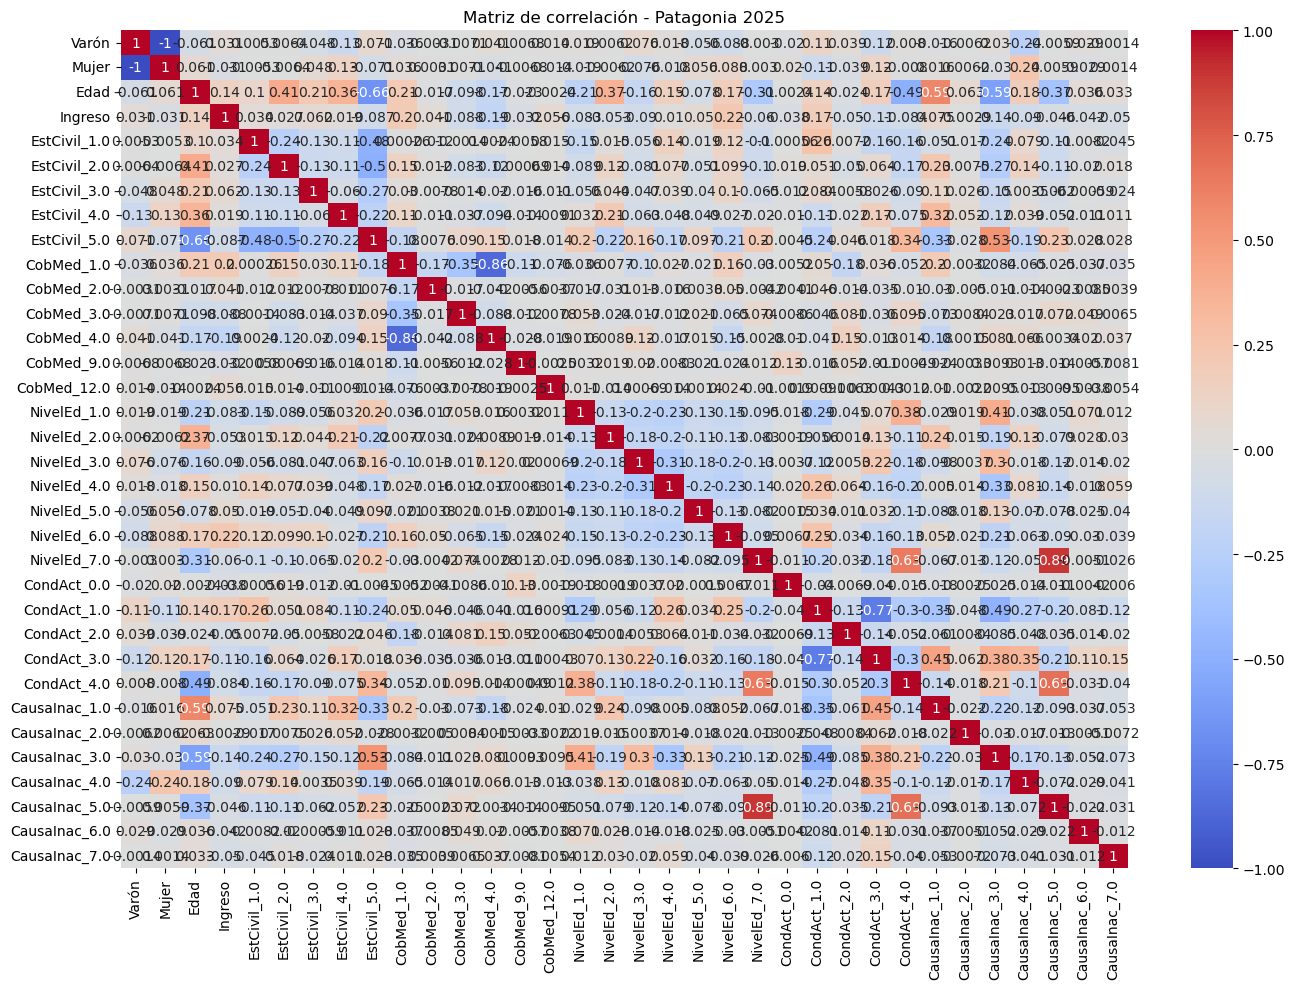


Comentario:
La matriz de correlación para Patagonia en 2005 y 2025 muestra cómo se relacionan las variables demográficas y laborales. Se observa una correlación positiva entre el nivel educativo y los ingresos, y entre la condición de actividad y el ingreso, lo que indica que personas con mayor educación y en actividad tienden a tener mejores ingresos. El sexo muestra baja correlación con el ingreso, lo que sugiere brecha moderada. Ciertas causas de inactividad y algunas coberturas médicas presentan correlaciones negativas con el empleo y los ingresos, evidenciando exclusión en ciertos grupos. Los patrones se mantienen estables entre 2005 y 2025, aunque puede haber variaciones menores por cambios sociales y económicos. El análisis sintético permite visualizar las conexiones entre educación, mercado laboral y estructura social en la región.



In [10]:

#Consigna 4

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---1. Limpieza robusta de la columna edad (ch06)
patagonia_limpia['Edad'] = patagonia_limpia['ch06'].replace({
    'Menos de 1 año': 0,
    'Ns./Nr.': np.nan,
    'No responde': np.nan
})

patagonia_limpia['Edad'] = pd.to_numeric(patagonia_limpia['Edad'], errors='coerce')

# --- 2. FILTROS POR AÑO ---
df_2005 = patagonia_limpia[patagonia_limpia['ano4'] == 2005].copy()
df_2025 = patagonia_limpia[patagonia_limpia['ano4'] == 2025].copy()

# --- 3. DUMMIES Y RENOMBRES ---
def preparar_base(df):
    # Dummies sexo
    df['Varón'] = (df['ch04'] == 1).astype(int)
    df['Mujer'] = (df['ch04'] == 2).astype(int)
    # Edad ya numérica
    # Dummies estado civil
    ecivil = pd.get_dummies(df['ch07'], prefix='EstCivil')
    # Dummies cobertura médica
    cobmed = pd.get_dummies(df['ch08'], prefix='CobMed')
    # Dummies nivel educativo
    nivel = pd.get_dummies(df['nivel_ed'], prefix='NivelEd')
    # Dummies condición actividad
    condact = pd.get_dummies(df['estado'], prefix='CondAct')
    # Dummies causa de inactividad
    causa = pd.get_dummies(df['cat_inac'], prefix='CausaInac')
    # Ingreso
    df_corr = pd.concat([
        df[['Varón', 'Mujer', 'Edad', 'ipcf']].rename(columns={'ipcf': 'Ingreso'}),
        ecivil, cobmed, nivel, condact, causa
    ], axis=1)
    # Eliminar filas con NA
    df_corr = df_corr.dropna()
    return df_corr

corr_2005 = preparar_base(df_2005).corr()
corr_2025 = preparar_base(df_2025).corr()

# --- 4. GRAFICAR MATRIZ DE CORRELACIÓN ---
plt.figure(figsize=(14,10))
sns.heatmap(corr_2005, vmin=-1, vmax=+1, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación - Patagonia 2005")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,10))
sns.heatmap(corr_2025, vmin=-1, vmax=+1, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación - Patagonia 2025")
plt.tight_layout()
plt.show()

# --- 5. COMENTARIO INTERPRETATIVO ---
print("""
Comentario:
La matriz de correlación para Patagonia en 2005 y 2025 muestra cómo se relacionan las variables demográficas y laborales. Se observa una correlación positiva entre el nivel educativo y los ingresos, y entre la condición de actividad y el ingreso, lo que indica que personas con mayor educación y en actividad tienden a tener mejores ingresos. El sexo muestra baja correlación con el ingreso, lo que sugiere brecha moderada. Ciertas causas de inactividad y algunas coberturas médicas presentan correlaciones negativas con el empleo y los ingresos, evidenciando exclusión en ciertos grupos. Los patrones se mantienen estables entre 2005 y 2025, aunque puede haber variaciones menores por cambios sociales y económicos. El análisis sintético permite visualizar las conexiones entre educación, mercado laboral y estructura social en la región.
""")

In [11]:
# Consigna 5

# Conteo de "no respondieron condición de actividad"

mask_no_resp = patagonia_limpia["estado"].isna() | (patagonia_limpia["estado"] == 0)

total_no_resp = mask_no_resp.sum()
por_anio = patagonia_limpia.groupby("ano4")["estado"].apply(
    lambda s: (s.isna() | (s == 0)).sum()
)

print("No respondieron (total):", total_no_resp)
print("No respondieron por año:")
print(por_anio)


# Helper para encontrar la columna ITF con nombres comunes
def encontrar_itf_col(df):
    candidatos = ["itf", "itf_total", "itf_tot"]
    for c in candidatos:
        if c in df.columns:
            return c
    raise KeyError(f"No se encontró columna ITF. Probé: {candidatos}. Columnas ejemplo: {list(df.columns)[:15]}")

# Nos aseguramos que las columnas estén en minúscula (ya lo hacías antes)
# df05 y df25 deberían existir de la #2a; si no, cargalos de nuevo y normalizá:
# df05 = pd.read_stata('usu_individual_t105.dta'); df05.columns = [c.strip().lower() for c in df05.columns]
# df25 = pd.read_excel('usu_individual_T125.xlsx'); df25.columns = [c.strip().lower() for c in df25.columns]

# Re-uso tu filtro Patagonia (ya definido antes como filtrar_patagonia)
pat05_raw = filtrar_patagonia(df05, "region").copy()
pat25_raw = filtrar_patagonia(df25, "region").copy()

# Añado año si no está
if "ano4" not in pat05_raw.columns: pat05_raw["ano4"] = 2005
if "ano4" not in pat25_raw.columns: pat25_raw["ano4"] = 2025

# Detecto columna ITF en cada base
itf05 = encontrar_itf_col(pat05_raw)
itf25 = encontrar_itf_col(pat25_raw)

# Armo bases respondieron / no respondieron por año
resp05 = pat05_raw.loc[pat05_raw[itf05].notna() & (pat05_raw[itf05] > 0)].copy()
nr05   = pat05_raw.loc[pat05_raw[itf05].fillna(-1).eq(0)].copy()

resp25 = pat25_raw.loc[pat25_raw[itf25].notna() & (pat25_raw[itf25] > 0)].copy()
nr25   = pat25_raw.loc[pat25_raw[itf25].fillna(-1).eq(0)].copy()

# Uno 2005+2025
respondieron   = pd.concat([resp05, resp25], ignore_index=True)
no_respondieron = pd.concat([nr05, nr25], ignore_index=True)

print("respondieron (ITF>0):", len(respondieron), " | 2005:", len(resp05), " | 2025:", len(resp25))
print("no respondieron (ITF=0):", len(no_respondieron), " | 2005:", len(nr05),  " | 2025:", len(nr25))



No respondieron (total): 13
No respondieron por año:
ano4
2005.0     2
2025.0    11
Name: estado, dtype: int64
respondieron (ITF>0): 7363  | 2005: 3206  | 2025: 4157
no respondieron (ITF=0): 1225  | 2005: 23  | 2025: 1202


In [12]:
#Consigna 6

import pandas as pd
import numpy as np
import unicodedata

# === 1) Función para normalizar texto ===
def norm(s):
    if pd.isna(s):
        return s
    s = str(s).strip()
    s = unicodedata.normalize('NFKD', s).encode('ascii','ignore').decode('ascii')
    return s.lower()

# === 2) Leer Excel sin encabezado y detectar fila con "Edad" ===
raw = pd.read_excel("tabla_adulto_equiv.xlsx", header=None)
col0 = raw.iloc[:,0].astype(str).apply(norm)
idx_hdr = col0[col0.str.contains("^edad$", na=False)].index[0]

# Tomar esa fila como encabezado
tabla_eq = raw.copy()
tabla_eq.columns = tabla_eq.iloc[idx_hdr]
tabla_eq = tabla_eq.iloc[idx_hdr+1:].reset_index(drop=True)

# Renombrar columnas
cols_norm = {c: norm(c) for c in tabla_eq.columns}
tabla_eq = tabla_eq.rename(columns=cols_norm)
rename_map = {}
for c in tabla_eq.columns:
    if "edad" in c: 
        rename_map[c] = "edad"
    elif "mujer" in c:
        rename_map[c] = "mujer"
    elif "varon" in c or "hombre" in c:
        rename_map[c] = "varon"
tabla_eq = tabla_eq.rename(columns=rename_map)

# Quedarse con columnas clave
tabla_eq = tabla_eq[[k for k in ["edad","mujer","varon"] if k in tabla_eq.columns]].copy()

# Limpiar columna edad
def parse_edad(x):
    s = str(x).strip()
    s_norm = norm(s)
    if s_norm.startswith("menor de 1"):
        return 0
    import re
    m = re.search(r"\d+", s_norm)
    if m:
        return int(m.group())
    return np.nan
tabla_eq["edad"] = tabla_eq["edad"].apply(parse_edad)

# Pasar valores de mujer/varon a numéricos
for c in ["mujer","varon"]:
    if c in tabla_eq.columns:
        tabla_eq[c] = pd.to_numeric(tabla_eq[c], errors="coerce")

tabla_eq = tabla_eq.dropna(subset=["edad"]).reset_index(drop=True)

# === 3) Formato largo y mapear sexo ===
tabla_long = tabla_eq.melt(id_vars=["edad"], 
                           value_vars=[c for c in ["mujer","varon"] if c in tabla_eq.columns],
                           var_name="sexo_txt", 
                           value_name="adulto_equiv")
map_sexo = {"varon":1,"mujer":2}
tabla_long["ch04"] = tabla_long["sexo_txt"].map(map_sexo)
tabla_long = tabla_long.rename(columns={"edad":"ch06"})
tabla_long = tabla_long[["ch06","ch04","adulto_equiv"]]

# === 4) Merge con la base patagonia_limpia ===
patagonia_equiv = patagonia_limpia.merge(tabla_long, on=["ch06","ch04"], how="left")

# === 5) Como no hay id_hogar en tu base, agrupamos por año ===
patagonia_equiv["ad_equiv_hogar"] = (
    patagonia_equiv.groupby("ano4")["adulto_equiv"].transform("sum")
)

# === 6) Resultados ===
print(patagonia_equiv[["ano4","ch06","ch04","adulto_equiv","ad_equiv_hogar"]].head())

totales = patagonia_equiv.groupby("ano4")["adulto_equiv"].sum()
print("\nTotales de adultos equivalentes por año:")
print(totales)


     ano4  ch06  ch04  adulto_equiv  ad_equiv_hogar
0  2005.0  46.0   1.0          1.00          937.73
1  2005.0  32.0   2.0           NaN          937.73
2  2005.0  14.0   1.0          0.96          937.73
3  2005.0   9.0   1.0          0.69          937.73
4  2005.0   3.0   2.0          0.51          937.73

Totales de adultos equivalentes por año:
ano4
2005.0     937.73
2025.0    1211.10
Name: adulto_equiv, dtype: float64


In [29]:
# Consigna 7 (versión sin llaves de hogar: usa proxy de hogar por ano4+ipcf)

import numpy as np

# 7.a) Calcular ad_equiv_hogar_proxy en patagonia_equiv (suma de adulto_equiv por ano4+ipcf)
if "adulto_equiv" not in patagonia_equiv.columns:
    raise KeyError("Falta 'adulto_equiv' en 'patagonia_equiv' (debería venir del punto 6).")

ad_eq_proxy = (
    patagonia_equiv
    .groupby(["ano4", "ipcf"], dropna=False)["adulto_equiv"]
    .sum()
    .reset_index()
    .rename(columns={"adulto_equiv": "ad_equiv_hogar"})
)

# 7.b) Unir el proxy a 'respondieron' por ano4+ipcf
respondieron = respondieron.drop(columns=["ad_equiv_hogar"], errors="ignore").merge(
    ad_eq_proxy, on=["ano4", "ipcf"], how="left"
)

# 7.c) ingreso_necesario = CBT * ad_equiv_hogar
CBT = {2005: 205.07, 2025: 365_177.0}
respondieron["ingreso_necesario"] = respondieron["ano4"].map(CBT) * respondieron["ad_equiv_hogar"]

# Evitar NaN por si hay filas sin match (muy raro, pero por las dudas)
respondieron.loc[respondieron["ad_equiv_hogar"].isna(), "ingreso_necesario"] = np.nan


In [21]:
# Consigna 8

# Detectar el nombre real de la columna ITF (case-insensitive / variantes)
itf_col = next((c for c in respondieron.columns if c.strip().lower() == "itf"), None)
if itf_col is None:
    for c in respondieron.columns:
        cname = c.strip().lower().replace(" ", "")
        if cname in ("itf", "ingresototalfamiliar"):
            itf_col = c
            break
if itf_col is None:
    raise KeyError(f"No encuentro la columna ITF en 'respondieron'. Columnas: {list(respondieron.columns)}")

# Crear 'pobre' sólo cuando ambas variables existen
respondieron["pobre"] = (
    respondieron[itf_col].notna()
    & respondieron["ingreso_necesario"].notna()
    & (respondieron[itf_col] < respondieron["ingreso_necesario"])
).astype(int)

# Resumen pedido
resumen_pobreza = (
    respondieron
    .groupby("ano4", dropna=False)
    .agg(pobres=("pobre", "sum"), n=("pobre", "size"))
    .reset_index()
)
resumen_pobreza["porcentaje_muestra"] = 100 * resumen_pobreza["pobres"] / resumen_pobreza["n"]
print(resumen_pobreza)

     ano4  pobres     n  porcentaje_muestra
0  2005.0     971  3206           30.286962
1  2025.0    1805  4157           43.420736


     ano4      mean       std   sum  count  porcentaje_pobreza
0  2005.0  0.302870  0.459571   971   3206           30.286962
1  2025.0  0.434207  0.495712  1805   4157           43.420736


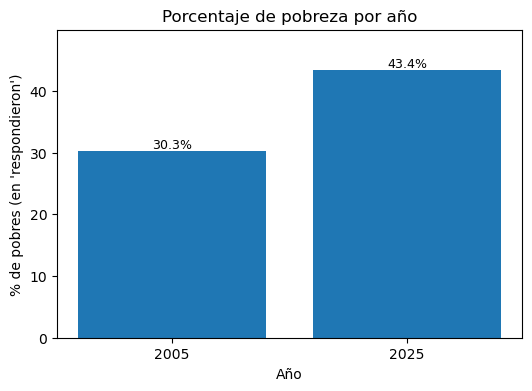

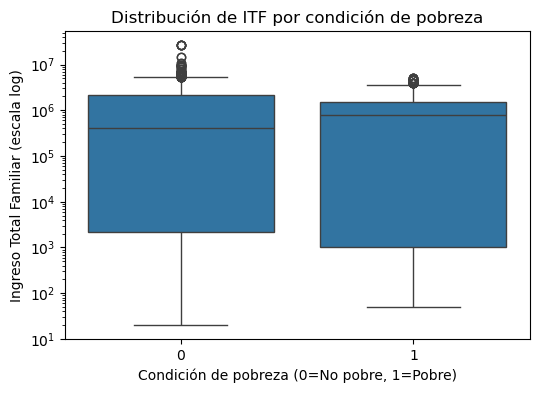

In [22]:
# Consigna 9

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Tabla: estadísticas de 'pobre' por año ---
tabla_pobre = (
    respondieron
    .groupby("ano4", dropna=False)["pobre"]
    .agg(mean="mean", std="std", sum="sum", count="count")
    .reset_index()
    .sort_values("ano4")
)
tabla_pobre["porcentaje_pobreza"] = 100 * tabla_pobre["mean"]
print(tabla_pobre)

# --- Gráfico 1: barras (% pobreza por año) con matplotlib puro (sin warnings) ---
plt.figure(figsize=(6,4))
x = tabla_pobre["ano4"].astype(int).astype(str).values
y = tabla_pobre["porcentaje_pobreza"].values
plt.bar(x, y)
for i, yi in enumerate(y):
    plt.text(i, yi, f"{yi:.1f}%", ha="center", va="bottom", fontsize=9)
plt.ylim(0, max(5, y.max()*1.15))
plt.ylabel("% de pobres (en 'respondieron')")
plt.xlabel("Año")
plt.title("Porcentaje de pobreza por año")
plt.show()

# --- Gráfico 2: boxplot de ITF por condición de pobreza (escala log) ---
# Usar el nombre REAL de ITF detectado antes
plot_df = respondieron[[itf_col, "pobre"]].copy()
plot_df.loc[plot_df[itf_col] <= 0, itf_col] = np.nan  # evitar problemas en el log

plt.figure(figsize=(6,4))
sns.boxplot(data=plot_df, x="pobre", y=itf_col)  # sin palette para esquivar warnings
plt.yscale("log")
plt.xlabel("Condición de pobreza (0=No pobre, 1=Pobre)")
plt.ylabel("Ingreso Total Familiar (escala log)")
plt.title("Distribución de ITF por condición de pobreza")
plt.show()